# Experiments

In [1]:
from pandas import read_csv
from scipy.stats import poisson, norm, nbinom, gaussian_kde, gamma
import scipy.stats as stats
# import os
import sys
# sys.path.append("/Users/karinabalagazova/Desktop/cvut/5.semestr/scientificProject/notebooks/..")
from functions.experiment import experiment, experiment_iteration
from functions.rnaseq_data_generator import rna_seq_generator, generate_rnaseq_class, get_random_beta
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('Solarize_Light2')
plt.style.use('seaborn-darkgrid')

### Real data distribution

In [89]:
# Load data
samples = read_csv('../19NQ013_samples.csv')
samples = samples.set_index('genes')
samples.head()

,OT_05,OT_17,OT_18,OT_21,OT_23,OT_33,OT_34,OT_62,OT_63,OT_64,...,STA_14_CNI,STA_15_nonCNI,STA_16_nonCNI,STA_17_CNI,STA_18_CNI,STA_19_CNI,STA_20_CNI,STA_21_CNI,STA_22_CNI,STA_23_CNI
genes,,,,,,,,,,,,,,,,,,,,,
ENST00000632684.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000434970.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000448914.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000415118.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000631435.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Leave only OT, CR and STA
drop_list = []
for patient in samples.columns:
    if patient[:2] != 'OT' and patient[:2] != 'CR' and patient[:3] != 'STA':
        drop_list.append(patient)
genes = samples.index.values
samples = samples.drop(drop_list[0:], axis=1)
samples.head()

,OT_05,OT_17,OT_18,OT_21,OT_23,OT_33,OT_34,OT_62,OT_63,OT_64,...,STA_14_CNI,STA_15_nonCNI,STA_16_nonCNI,STA_17_CNI,STA_18_CNI,STA_19_CNI,STA_20_CNI,STA_21_CNI,STA_22_CNI,STA_23_CNI
genes,,,,,,,,,,,,,,,,,,,,,
ENST00000632684.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000434970.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000448914.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000415118.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000631435.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Delete transcripts with zero expression
samples = samples[(samples.sum(axis=1) > 0) & (samples.max(axis=1) > 1)]
print('Number of all genes after data filtering: ', samples.sum(axis=1).count())
samples.head()

Number of all genes after data filtering:  128835


,OT_05,OT_17,OT_18,OT_21,OT_23,OT_33,OT_34,OT_62,OT_63,OT_64,...,STA_14_CNI,STA_15_nonCNI,STA_16_nonCNI,STA_17_CNI,STA_18_CNI,STA_19_CNI,STA_20_CNI,STA_21_CNI,STA_22_CNI,STA_23_CNI
genes,,,,,,,,,,,,,,,,,,,,,
ENST00000390396.1,0,1,1,1,0,2,0,1,1,4,...,11,0,1,1,0,0,2,1,2,1
ENST00000390400.2,6,12,4,2,8,0,2,1,12,5,...,26,10,1,0,3,4,6,4,1,7
ENST00000621184.1,0,0,2,1,1,1,0,1,0,1,...,0,1,3,4,1,0,1,0,0,3
ENST00000390372.3,1,0,3,0,0,0,0,0,0,0,...,0,0,0,4,0,1,0,1,0,0
ENST00000390369.2,3,0,0,0,0,0,0,0,1,0,...,0,4,0,2,4,0,1,0,4,2


         2
0.04519 x + 1.17 x + 0.1613


<ipython-input-92-0c51a86c3639>:13: RuntimeWarning: divide by zero encountered in log
  yfit = lambda xx: np.exp(poly(np.log(xx)))
/Users/karinabalagazova/miniconda3/envs/RPZ/lib/python3.8/site-packages/numpy/lib/polynomial.py:734: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


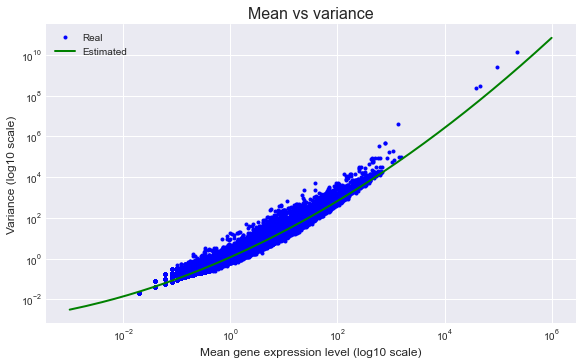

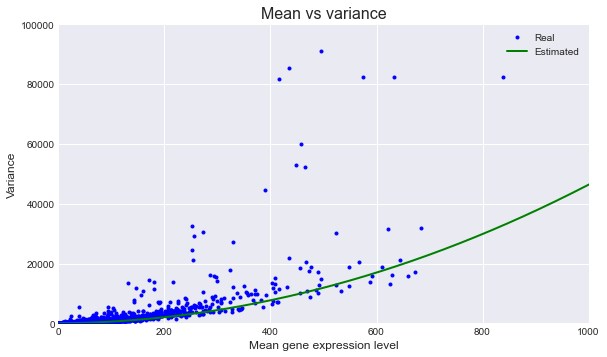

In [92]:
# LEARN COEFFICIENT for MEAN & VARIANCE relation
x = samples.mean(axis=1).to_numpy()
y = samples.std(axis=1).to_numpy() **2
logx = np.ma.log(x)
logy = np.ma.log(y)
logx.filled(0)
logy.filled(0)
coeffs = np.polyfit(logx, logy, 2)

poly = np.poly1d(coeffs)
print(poly)

yfit = lambda xx: np.exp(poly(np.log(xx)))

plt.figure(figsize=(9.5, 5.5))
plt.loglog(x,y, 'b.', label='Real')
xline = np.append(np.arange(0, 1, 0.001), np.arange(1, 10e+5))
plt.loglog(xline,yfit(xline), 'g-', label='Estimated')
plt.title('Mean vs variance')
plt.xlabel('Mean gene expression level (log10 scale)')
plt.ylabel('Variance (log10 scale)')
plt.legend()
plt.show()

plt.figure(figsize=(9.5, 5.5))
plt.plot(x,y, 'b.', label='Real')
xline = np.append(np.arange(0, 1, 0.001), np.arange(1, 10e+5))
plt.plot(xline,poly(xline), 'g-', label='Estimated')
plt.xlim(0, 1000)
plt.ylim(0, 100000)
plt.title('Mean vs variance')
plt.xlabel('Mean gene expression level')
plt.ylabel('Variance')
plt.legend()
plt.show()


#
# 0.04519 x + 1.17 x + 0.1613
# 0.07063 x + 1.087 x + 0.1965, zustaly jen (samples.sum(axis=1) > 0) & (samples.max(axis=1) > 1)

In [104]:
samples = read_csv('../19NQ013_samples.csv')
samples = samples.set_index('genes')
# Delete transcripts with small expression
print('Number of all genes: ', samples.sum(axis=1).count())
print('Number of genes which have > 30 counts: ', (samples.sum(axis=1) > 30).value_counts())
print('Number of genes which have a least 9 counts in one of sample: ', (samples.max(axis=1) > 9).value_counts())
samples = samples[(samples.sum(axis=1) > 30) & (samples.max(axis=1) > 9)]
# print(samples[(samples.sum(axis=1) > 30) & (samples.max(axis=1) > 9)].value_counts())
print('Number of all genes after data filtering: ', samples.sum(axis=1).count())
samples.head()
# Leave only OT, CR and STA
drop_list = []
for patient in samples.columns:
    if patient[:2] != 'OT' and patient[:2] != 'CR' and patient[:3] != 'STA':
        drop_list.append(patient)
genes = samples.index.values
samples = samples.drop(drop_list[0:], axis=1)
samples.head()

Number of all genes:  187626
Number of genes which have > 30 counts:  True     102670
False     84956
dtype: int64
Number of genes which have a least 9 counts in one of sample:  False    142523
True      45103
dtype: int64
Number of all genes after data filtering:  45095


,OT_05,OT_17,OT_18,OT_21,OT_23,OT_33,OT_34,OT_62,OT_63,OT_64,...,STA_14_CNI,STA_15_nonCNI,STA_16_nonCNI,STA_17_CNI,STA_18_CNI,STA_19_CNI,STA_20_CNI,STA_21_CNI,STA_22_CNI,STA_23_CNI
genes,,,,,,,,,,,,,,,,,,,,,
ENST00000390396.1,0,1,1,1,0,2,0,1,1,4,...,11,0,1,1,0,0,2,1,2,1
ENST00000390400.2,6,12,4,2,8,0,2,1,12,5,...,26,10,1,0,3,4,6,4,1,7
ENST00000390468.1,4,7,4,4,5,5,2,5,8,4,...,2,1,7,5,0,3,6,9,1,3
ENST00000390424.2,0,5,3,0,8,6,0,3,7,2,...,1,7,7,5,2,2,5,2,9,6
ENST00000390463.3,0,3,2,1,2,1,0,2,4,3,...,0,1,0,2,0,0,5,6,4,0


/Users/karinabalagazova/miniconda3/envs/RPZ/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


38141.587071148766 3.0232211797447146 -0.22073925596708738 5.989855527018593


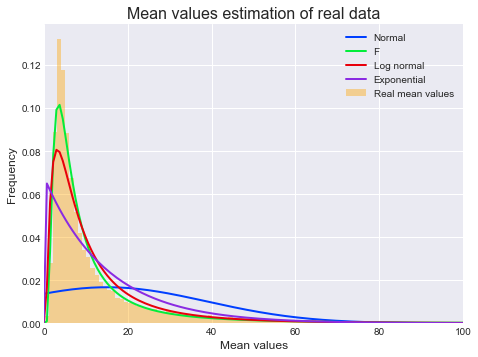

In [94]:
import scipy.stats as stats
plt.style.use('seaborn-bright')
h = samples.mean(axis=1)
h = h[h < 300]
bins = np.arange(80)

x1 = np.sort(h)
x1 = x1[:-4]
kde = stats.gaussian_kde(x1, bw_method=0.1)
xs = np.linspace(-10, np.max(x1), num=400)
y1 = kde(xs)

fig, ax = plt.subplots()
fig.set_size_inches(7.5, 5.5, forward=True)

p1, p2 = norm.fit(h)
ax.plot(xs, norm.pdf(xs, p1, p2), label='Normal')

p1, p2, p3, p4 = stats.f.fit(h)
print(p1, p2, p3, p4)
ax.plot(xs, stats.f.pdf(xs, p1, p2, p3, p4), label='F', linewidth=2)

p1, p2, p3 = stats.lognorm.fit(h)
ax.plot(xs, stats.lognorm.pdf(xs, p1, p2, p3), label='Log normal')

p1, p2 = stats.expon.fit(h)
ax.plot(xs, stats.expon.pdf(xs, p1, p2), label='Exponential')

ax.hist(h, density=True, bins=bins, color='orange', alpha=0.4, label='Real mean values')

ax.set_xlim(0, 100)
ax.legend()
plt.xlabel('Mean values')
plt.ylabel('Frequency')
plt.title('Mean values estimation of real data')
plt.savefig('Mean_values_estimation.png')
plt.show()

### Simulated data distribution

[ 309  798  296  215  423  497  139  269  563  459  333  420  483  524
  424  548 1025  203  289  173  120  426  522  349  146  515  810  278
  367  862  214  447  453  277  343  263  485  260  232  446  532  288
  149  636  768  806  580  998  490  929]
Mean estimated:  447.62
Std estimated:  97.86755946864838
Mean real:  447.62
Std real:  227.99762191742266


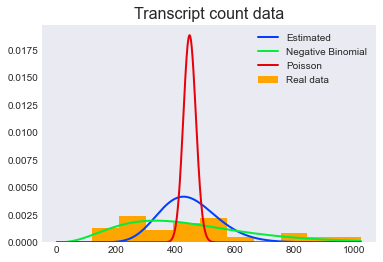

In [95]:
# Show histogram of overdispersed transcript
transcript_counts = samples.loc["ENST00000361899.2",:].to_numpy()
print(transcript_counts)
x = range(0, max(transcript_counts))
plt.hist(transcript_counts, color='orange', density=True, label='Real data')

mean = transcript_counts.mean()
std_real = transcript_counts.std()
std = np.sqrt(poly(transcript_counts.mean()))

p = mean/std**2
n = mean*p/(1.0 - p)
plt.plot(x, nbinom.pmf(x, n, p), label='Estimated')
print('Mean estimated: ', nbinom.mean(n, p))
print('Std estimated: ', nbinom.std(n, p))

p = mean/std_real**2
n = mean*p/(1.0 - p)
plt.plot(x, nbinom.pmf(x, n, p), label='Negative Binomial')
print('Mean real: ', nbinom.mean(n, p))
print('Std real: ', nbinom.std(n, p))

plt.plot(x, poisson.pmf(x, mean), label='Poisson')
plt.grid()
plt.legend()
plt.title('Transcript count data')
plt.savefig('transcript_count_data_estimation.png')
plt.show()

In [115]:
a, b, _ = rna_seq_generator(
        n_transcripts=10000,
        distribution="Negative binomial",
        n_STA=30, n_CR=15, n_OT=15,
        n_IS_effect=10, IS_effect=(0.5, 0.52),  # strong IS effect
        is_class_effect=False, n_class_effect=10, class_effect=(0.2, 0.2)  # class effect, normal distribution
)

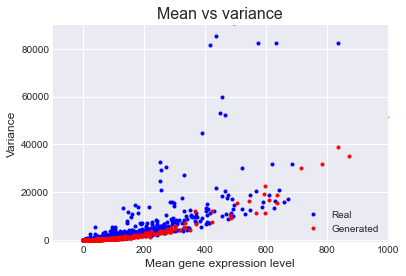

In [116]:
x = samples.mean(axis=1).to_numpy()
y = samples.std(axis=1).to_numpy()**2
plt.plot(x[x<5000],y[x<5000], 'b.', label='Real')

x = a.mean(axis=1).to_numpy()
y = a.std(axis=1).to_numpy()**2
plt.plot(x[x<5000],y[x<5000], 'r.', label='Generated')

# plt.plot(np.arange(500), 0.06523 * np.arange(500) ** 2 + 1.121 * np.arange(500) + 0.235)
plt.xlim(-100, 1000)
plt.ylim(-1000, 9*1e+4)

plt.legend()
plt.title('Mean vs variance')
plt.xlabel('Mean gene expression level')
plt.ylabel('Variance')
plt.savefig('mean_vs_variance_generated.png')

### Experiments
#### Generate count data with POISSON distribution

In [124]:
# experiment settings
STA_range = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
n_repeats = 100
n_STA = STA_range[-1]  # maximal number of STA patients

# arrays for AUC results
mean_auc_results_origin = np.zeros((n_repeats, len(STA_range)))
mean_auc_results_expected = np.zeros((n_repeats, len(STA_range)))
mean_auc_results_filtered = np.zeros((n_repeats, len(STA_range)))

In [74]:
for j in range(n_repeats):
    a, b, c = rna_seq_generator(
        n_transcripts=100,
        distribution="Poisson",
        n_STA=n_STA, n_CR=15, n_OT=15,
        n_IS_effect=10, IS_effect=(0.5, 0.6),  # strong IS effect
        is_class_effect=False, n_class_effect=10, class_effect=(0.2, 0.2)  # class effect, normal distribution
    )
    patient_labels = a.columns

    for i in range(len(STA_range)):
        # leave only STA_range[i] STA patients
        a_tmp = a.drop(patient_labels[range(n_STA - STA_range[i])], axis=1)
        b_tmp = b.drop(patient_labels[range(n_STA - STA_range[i])], axis=1)
        c_tmp = c.drop(patient_labels[range(n_STA - STA_range[i])], axis=0)
        try:
            d, e, f = experiment(a_tmp, b_tmp, c_tmp, n_CR=15, distribution="Poisson")
            mean_auc_results_origin[j, i] = d.mean()
            mean_auc_results_expected[j, i] = e.mean()
            mean_auc_results_filtered[j, i] = f.mean()
        except: # when STA number is too small, there are the PerfectSeparation error
            # print('Exception for ', STA_range[i], ' STA patients.')
            mean_auc_results_origin[j, i] = np.nan
            mean_auc_results_expected[j, i] = np.nan
            mean_auc_results_filtered[j, i] = np.nan

/Users/karinabalagazova/miniconda3/envs/RPZ/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/karinabalagazova/miniconda3/envs/RPZ/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/karinabalagazova/miniconda3/envs/RPZ/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/Users/karinabalagazova/miniconda3/envs/RPZ/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/karinabalagazova/miniconda3/envs/RPZ/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value encountered in multiply
  re

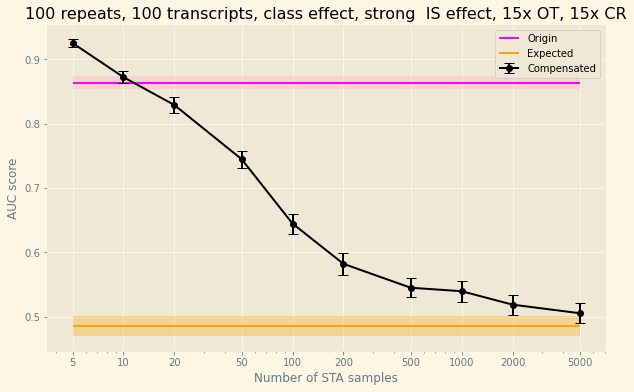

In [76]:
indexes = range(n_repeats)

fig,ax = plt.subplots()
ax.set_xscale('log')
ax.set_xticks(STA_range)
ax.set_xticklabels(STA_range)

fig.set_size_inches(10, 6)

origin = ax.hlines(np.nanmean(mean_auc_results_origin[indexes]), STA_range[0],  STA_range[-1], colors=['magenta'], label='Origin')
ax.fill_between(STA_range, np.nanmean(mean_auc_results_origin[indexes]) - np.nanstd(mean_auc_results_origin[indexes])/np.sqrt(n_repeats), np.nanmean(mean_auc_results_origin[indexes]) + np.nanstd(mean_auc_results_origin[indexes])/np.sqrt(n_repeats),facecolor='pink', alpha= 0.5 )

filtered = ax.errorbar(STA_range, np.nanmean(mean_auc_results_filtered[indexes], axis=0), np.nanstd(mean_auc_results_filtered[indexes], axis=0)/np.sqrt(n_repeats), ecolor= 'black', fmt='-ok', capsize=5, label='Compensated') #green

expected = ax.hlines(np.nanmean(mean_auc_results_expected[indexes]),  STA_range[0],  STA_range[-1], colors=['orange'], label='Expected') #orange
ax.fill_between(STA_range, np.nanmean(mean_auc_results_expected[indexes]) - np.nanstd(mean_auc_results_expected[indexes])/np.sqrt(n_repeats), np.nanmean(mean_auc_results_expected[indexes]) + np.nanstd(mean_auc_results_expected[indexes])/np.sqrt(n_repeats),facecolor='orange', alpha= 0.3 )

ax.legend()
plt.title(n_repeats + ' repeats, 100 transcripts, no class effect, strong  IS effect, 15x OT, 15x CR')
plt.xlabel('Number of STA samples')
plt.ylabel('AUC score')
plt.show()
fig.savefig('SAVEFIG.png')

#### Generate count data with Negative binomial distribution

In [227]:
# experiment settings
STA_range = [10, 20]#, 20, 50, 100, 200, 500]#, 1000, 2000, 5000] #, 10000]
n_repeats = 10
n_STA = STA_range[-1]  # maximal number of STA patients

# arrays for AUC results
mean_auc_results_origin = np.zeros((n_repeats, len(STA_range)))
mean_auc_results_expected = np.zeros((n_repeats, len(STA_range)))
mean_auc_results_filtered = np.zeros((n_repeats, len(STA_range)))

In [188]:
# generate dataset once for one experiment
n_genSTA = 1000 # pocet nagenerovanych STA
import random
gen_origin, gen_expected, gen_IS = rna_seq_generator(
    n_transcripts=10000,
    distribution="Negative binomial",
    n_STA=n_genSTA, n_CR=15, n_OT=15,
    n_IS_effect=2, IS_effect=(0.5, 0.501),  # IS effect
    is_class_effect=False, n_class_effect=2, class_effect=(0.3, 0.1)  # class effect, normal distribution
)

ValueError: too many values to unpack (expected 3)

In [70]:
for j in range(n_repeats):
    STA_samples_random_index = random.sample(range(n_genSTA), n_genSTA-n_STA)
    a = gen_origin.drop(gen_origin.columns[STA_samples_random_index], axis=1)
    b = gen_expected.drop(gen_expected.columns[STA_samples_random_index], axis=1)
    c = gen_IS.drop(gen_IS.index[STA_samples_random_index], axis=0)

    patient_labels = a.columns

    for i in range(len(STA_range)):
        # leave only STA_range[i] STA patients
        a_tmp = a.drop(patient_labels[range(n_STA - STA_range[i])], axis=1)
        b_tmp = b.drop(patient_labels[range(n_STA - STA_range[i])], axis=1)
        c_tmp = c.drop(patient_labels[range(n_STA - STA_range[i])], axis=0)
        try:
            #,f
            d, e = experiment(a_tmp, b_tmp, c_tmp, n_CR=15, distribution="Negative binomial")
            mean_auc_results_origin[j, i] = d.mean()
            mean_auc_results_expected[j, i] = e.mean()
            # mean_auc_results_filtered[j, i] = f.mean()
        except: # when STA number is too small, there are the PerfectSeparation error
            print('Exception when ', STA_range[i], ' STA samples.')
            mean_auc_results_origin[j, i] = np.nan
            mean_auc_results_expected[j, i] = np.nan
            mean_auc_results_filtered[j, i] = np.nan


In [274]:
n_genCR = 200
n_genOT = 200
_, _, _, gen_counts, gen_expected, gen_IS = rna_seq_generator(
    n_transcripts=10,
    distribution="Negative binomial",
    n_STA=n_genSTA, n_CR=n_genCR, n_OT=n_genOT,
    n_IS_effect=5, IS_effect=(0.5, 0.501),
    is_class_effect=False, n_class_effect=5, class_effect=(0.3, 0.1)  # class effect, normal distribution
)
mean_auc_results_origin, mean_auc_results_expected, mean_auc_results_filtered = \
        experiment_iteration(STA_range, n_repeats,
                             gen_counts, gen_expected, gen_IS,
                             n_genSTA, n_genCR, n_genOT, "Negative binomial")

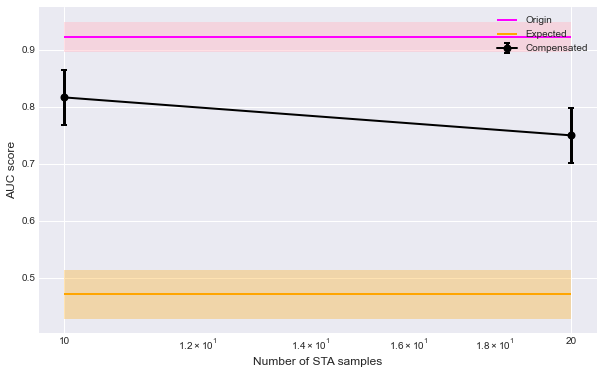

In [275]:
indexes = range(n_repeats)

fig,ax = plt.subplots()
ax.set_xscale('log')
ax.set_xticks(STA_range)
ax.set_xticklabels(STA_range)

fig.set_size_inches(10, 6)

origin = ax.hlines(np.nanmean(mean_auc_results_origin[indexes]), STA_range[0], STA_range[-1], colors=['magenta'], label='Origin')
ax.fill_between(STA_range, np.nanmean(mean_auc_results_origin[indexes]) - np.nanstd(mean_auc_results_origin[indexes])/np.sqrt(n_repeats), np.nanmean(mean_auc_results_origin[indexes]) + np.nanstd(mean_auc_results_origin[indexes])/np.sqrt(n_repeats),facecolor='pink', alpha= 0.5 )

filtered = ax.errorbar(STA_range, np.nanmean(mean_auc_results_filtered[indexes], axis=0), np.nanstd(mean_auc_results_filtered[indexes], axis=0)/np.sqrt(n_repeats), ecolor= 'black', fmt='-ok', capsize=3, elinewidth=3, markeredgewidth=2, label='Compensated') #green

expected = ax.hlines(np.nanmean(mean_auc_results_expected[indexes]), STA_range[0],  STA_range[-1], colors=['orange'], label='Expected') #orange
ax.fill_between(STA_range, np.nanmean(mean_auc_results_expected[indexes]) - np.nanstd(mean_auc_results_expected[indexes])/np.sqrt(n_repeats), np.nanmean(mean_auc_results_expected[indexes]) + np.nanstd(mean_auc_results_expected[indexes])/np.sqrt(n_repeats),facecolor='orange', alpha= 0.3 )

# ax.errorbar(STA_range, np.nanmean(mean_auc_results_expected[indexes], axis=0), np.nanstd(mean_auc_results_filtered[indexes], axis=0)/np.sqrt(n_repeats), ecolor= 'black', fmt='-ok', capsize=3, elinewidth=3, markeredgewidth=2, label='Compensated') #green

ax.legend()
plt.xlabel('Number of STA samples')
plt.ylabel('AUC score')
plt.show()

In [273]:
n_genCR = 200
n_genOT = 200
_, _, _, gen_counts, gen_expected, gen_IS = rna_seq_generator(
    n_transcripts=10,
    distribution="Negative binomial",
    n_STA=n_genSTA, n_CR=n_genCR, n_OT=n_genOT,
    n_IS_effect=5, IS_effect=(0.5, 0.501),
    is_class_effect=False, n_class_effect=5, class_effect=(0.3, 0.1)  # class effect, normal distribution
)

In [270]:
print(n_repeats)
for j in range(1):
    # a, b, c, _, _, _ = rna_seq_generator(
    #     n_transcripts=100,
    #     distribution="Negative binomial",
    #     n_STA=n_STA, n_CR=15, n_OT=15,
    #     n_IS_effect=2, IS_effect=(0.5, 0.501),  # IS effect
    #     is_class_effect=False, n_class_effect=5, class_effect=(0.4, 0.1)  # class effect, normal distribution
    # )
    STA_random_index = random.sample(range(n_genSTA), n_STA)
    CR_random_index = random.sample(range(n_genCR), 15)
    OT_random_index = random.sample(range(n_genOT), 15)

    counts_STA = gen_counts[0][gen_counts[0].columns[STA_random_index]]
    counts_CR = gen_counts[1][gen_counts[1].columns[CR_random_index]]
    counts_OT = gen_counts[2][gen_counts[2].columns[OT_random_index]]

    expected_STA = gen_expected[0][gen_expected[0].columns[STA_random_index]]
    expected_CR = gen_expected[1][gen_expected[1].columns[CR_random_index]]
    expected_OT = gen_expected[2][gen_expected[2].columns[OT_random_index]]

    IS_STA = gen_IS[0].loc[gen_IS[0].index[STA_random_index].to_numpy()]
    IS_CR = gen_IS[1].loc[gen_IS[1].index[CR_random_index]]
    IS_OT = gen_IS[2].loc[gen_IS[2].index[OT_random_index]]

    a = pd.concat([counts_STA, counts_CR, counts_OT], axis=1)
    b = pd.concat([expected_STA, expected_CR, expected_OT], axis=1)
    c = pd.concat([IS_STA, IS_CR, IS_OT], axis=0)

    patient_labels = a.columns

    for i in range(len(STA_range)):
        # leave only STA_range[i] STA patients
        a_tmp = a.drop(patient_labels[range(n_STA - STA_range[i])], axis=1)
        b_tmp = b.drop(patient_labels[range(n_STA - STA_range[i])], axis=1)
        c_tmp = c.drop(patient_labels[range(n_STA - STA_range[i])], axis=0)
        try:
            d, e, f = experiment(a_tmp, b_tmp, c_tmp, n_CR=15, distribution="Negative binomial")
            mean_auc_results_origin[j, i] = d.mean()
            mean_auc_results_expected[j, i] = e.mean()
            mean_auc_results_filtered[j, i] = f.mean()
        except Exception as e: # when STA number is too small, there are the PerfectSeparation error
            print('Exception for ', STA_range[i], ' STA patients.')
            print( "Error:", e )
            mean_auc_results_origin[j, i] = np.nan
            mean_auc_results_expected[j, i] = np.nan
            mean_auc_results_filtered[j, i] = np.nan

print(n_repeats)

10
compensation
compensation end 
compensation
compensation end 
10
